Hello there!
This is my first attempt of publishing some code in GitHub.
I will try to demonstrate the usage of Keras library and simple MLP network.

For this network I am using Keras with Tensorflow backend which is GPU enabled(NVIDIA GeForce GTX 850M 2GB).

First of all we import libraries:

In [1]:
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
from keras.layers import Input, Dense, Dropout, merge
from keras.models import Model
from keras.callbacks import TensorBoard
from keras.utils.visualize_util import plot
%matplotlib inline

Using TensorFlow backend.


Then we download MNIST dataset to tmp file:

In [2]:
mnist = input_data.read_data_sets("/tmp/data/", one_hot = True)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


We divide the data on to training and testing datasets

In [3]:
X_train, y_train = mnist.train.images, mnist.train.labels
X_test, y_test = mnist.test.images, mnist.test.labels

We create the network:

In [4]:
# Input 
main_input = Input(shape=(784,), name='main_input')

# First hidden layer
x = Dense(128, init='uniform', activation='relu', name='hidden_1')(main_input)
x = Dropout(0.5)(x)

# Branch left hidden layer
x_1 = Dense(64, init='uniform', activation='relu', name='hidden_2')(x)
x_1 = Dropout(0.5)(x_1)

# Branch right hidden layer
x_2 = Dense(64, init='uniform', activation='relu', name='hidden_3')(x)
x_2 = Dropout(0.5)(x_2)

# Merged hidden layer
x_3 = merge([x_1, x_2], mode='concat')
x_3 = Dense(32, init='uniform', activation='relu', name='merged')(x_3)

# Output
main_output = Dense(10, activation='sigmoid', name='main_output')(x_3)

Now we just need to compile the network

In [5]:
tensorboard = TensorBoard(log_dir="/tmp/tensorflow_logs/example", write_graph=True,
                          write_images=False, histogram_freq=0)

model = Model(input=[main_input], output=[main_output])

model.compile(optimizer='adam', loss='categorical_crossentropy',
             callbacks=[tensorboard], metrics=['accuracy'])

Now we train the network:

In [6]:
model.fit({'main_input': X_train},
          {'main_output': y_train},
          nb_epoch=15, batch_size=32,
          validation_data=(X_test, y_test))

/home/kinshiryuu/anaconda3/lib/python3.5/site-packages/keras/backend/tensorflow_backend.py:1620: UserWarning: Expected no kwargs, you passed 1
kwargs passed to function are ignored with Tensorflow backend
  warnings.warn('\n'.join(msg))


Train on 55000 samples, validate on 10000 samples
Epoch 1/15
55000/55000 [==============================] - 8s - loss: 0.5403 - acc: 0.8339 - val_loss: 0.1980 - val_acc: 0.9372
Epoch 2/15
55000/55000 [==============================] - 6s - loss: 0.2845 - acc: 0.9172 - val_loss: 0.1368 - val_acc: 0.9590
Epoch 3/15
55000/55000 [==============================] - 7s - loss: 0.2411 - acc: 0.9308 - val_loss: 0.1321 - val_acc: 0.9595
Epoch 4/15
55000/55000 [==============================] - 7s - loss: 0.2182 - acc: 0.9366 - val_loss: 0.1188 - val_acc: 0.9634
Epoch 5/15
55000/55000 [==============================] - 7s - loss: 0.2011 - acc: 0.9418 - val_loss: 0.1130 - val_acc: 0.9675
Epoch 6/15
55000/55000 [==============================] - 7s - loss: 0.1912 - acc: 0.9441 - val_loss: 0.1039 - val_acc: 0.9685
Epoch 7/15
55000/55000 [==============================] - 7s - loss: 0.1824 - acc: 0.9459 - val_loss: 0.1015 - val_acc: 0.9709
Epoch 8/15
55000/55000 [==============================] - 7s 

Now we save out graph:

In [7]:
plot(model, to_file='model_1.png')

You can see how this network looks like:

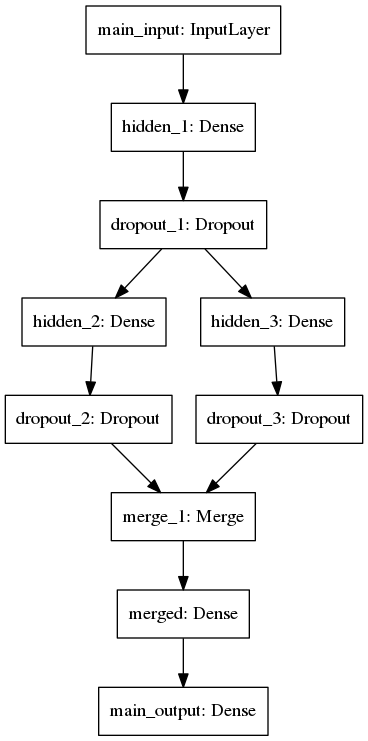

In [8]:
from IPython.display import Image
Image(filename='model_1.png')

Or if you want to analize the network in Tensorboard use this command in terminal: "tensorboard --logdir=/tmp/tensorflow_logs"

If you want to display data properly use only newest log.

Thanks for attention! I hope this can help someone! Let me know if something is bad or you don't understand something.